In [6]:
# Map of observations during Helene
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cf
import geopandas as gpd
import numpy as np

In [3]:
df = pd.read_csv('water_level_sites.csv')
df

,name,longname,longitude,latitude,type,Exposure,Sensor Elevation (m NAVD88),NAVD88,MLLW,MSL,MHHW,Sample Interval (s),Unnamed: 12
0,8723970,"Vaca Key, Florida Bay",-81.106500,24.711000,tide_gauge,ocean,NaN,0.0,-0.407,-0.251,-0.110,360.0,NaN
1,8724580,Key West,-81.808100,24.550800,tide_gauge,ocean,NaN,0.0,-0.538,-0.266,0.013,360.0,NaN
2,8725110,"Naples, Gulf of Mexico",-81.807500,26.131700,tide_gauge,ocean,NaN,0.0,-0.690,-0.188,0.107,360.0,removed 2024-01-12
3,8725114,"Naples Bay, North",-81.788300,26.136700,tide_gauge,bay,NaN,0.0,-0.630,-0.152,0.135,360.0,NaN
4,8725520,Fort Myers,-81.871000,26.648000,tide_gauge,bay,NaN,0.0,-0.318,-0.125,0.083,360.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,FLFRA29933,Pressure Transducer at FLFRA29933,-84.832607,29.671549,tide_gauge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,FLFRA29933,Pressure Transducer at FLFRA29933,-84.832607,29.671549,tide_gauge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,FLPIN26405,Pressure Transducer at FLPIN26405,-82.805199,28.152819,tide_gauge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,FLPIN35746,Pressure Transducer at FLPIN35746,-82.785461,28.152385,tide_gauge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


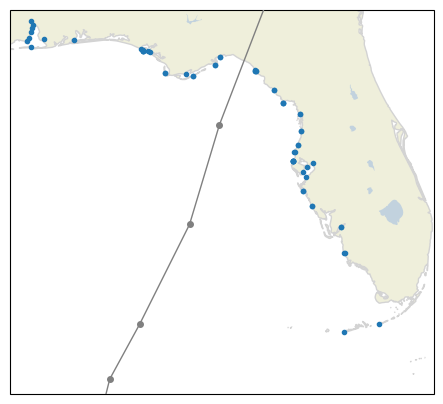

In [25]:
cpc = crs.PlateCarree()

fig1 = plt.figure()
ax1 = fig1.add_axes((0.12, 0.125, 0.8, 0.8),projection=cpc)
ax1.set_extent([-88.5, -80, 23.3, 31])
#ax1.add_feature(cf.STATES, edgecolor='lightblue', linewidth=2, zorder=-1)
ax1.add_feature(cf.LAND, edgecolor='lightgray', linewidth=1, zorder=-1)
#ax1.add_feature(cf.COASTLINE)
#ax1.add_feature(cf.BORDERS, linestyle=':')
ax1.add_feature(cf.LAKES, alpha=0.5)
#ax1.add_feature(cf.RIVERS)

## That sets up the plot.  To plot something, I'll just open the shapefile with the nhc best track

gd1 = gpd.read_file('AL092024_pts.shp')
lt1 = gd1.LAT
ln1 = gd1.LON
hurpth = np.array(list(zip(ln1,lt1)))

ax1.plot(hurpth[:,0],hurpth[:,1],'o-', markersize=4, linewidth=1, c='gray', zorder=5)
ax1.plot(df['longitude'],df['latitude'],'.')

In [21]:
gd1

,STORMNAME,DTG,YEAR,MONTH,DAY,HHMM,MSLP,BASIN,STORMNUM,STORMTYPE,INTENSITY,SS,LAT,LON,geometry
0,HELENE,2.024092e+09,2024.0,09,24.0,1200,1000.0,al,9.0,TS,40.0,0.0,19.2,-83.6,POINT (-83.6 19.2)
1,HELENE,2.024092e+09,2024.0,09,24.0,1800,997.0,al,9.0,TS,45.0,0.0,19.4,-84.6,POINT (-84.6 19.4)
2,HELENE,2.024092e+09,2024.0,09,25.0,0000,991.0,al,9.0,TS,50.0,0.0,19.7,-85.2,POINT (-85.2 19.7)
3,HELENE,2.024093e+09,2024.0,09,25.0,0600,986.0,al,9.0,TS,55.0,0.0,20.3,-85.9,POINT (-85.9 20.3)
4,HELENE,2.024093e+09,2024.0,09,25.0,1200,979.0,al,9.0,HU,65.0,1.0,21.1,-86.2,POINT (-86.2 21.1)
5,HELENE,2.024093e+09,2024.0,09,25.0,1800,978.0,al,9.0,HU,75.0,1.0,22.0,-86.6,POINT (-86.6 22)
6,HELENE,2.024093e+09,2024.0,09,26.0,0000,973.0,al,9.0,HU,75.0,1.0,22.8,-86.7,POINT (-86.7 22.8)
7,HELENE,2.024093e+09,2024.0,09,26.0,0600,970.0,al,9.0,HU,75.0,1.0,23.6,-86.5,POINT (-86.5 23.6)
8,HELENE,2.024093e+09,2024.0,09,26.0,1200,960.0,al,9.0,HU,85.0,2.0,24.7,-85.9,POINT (-85.9 24.7)
9,HELENE,2.024093e+09,2024.0,09,26.0,1800,958.0,al,9.0,HU,105.0,3.0,26.7,-84.9,POINT (-84.9 26.7)
